In [3]:
import matplotlib.pyplot as plt
import numpy as np

## 基本概念

- figure：最大的对象，可以包含很多的绘图区域，可以将其视为 canvas
- axes：绘图区域，可以在这个对象上调用 `plot()` 方法进行绘图
    - 注：axes 必须属于某个 figure
- axis：图上的一个轴，二维的 axes 通常有两个轴

> 完整系统的教程：[https://matplotlib.org/stable/tutorials/index.html](https://matplotlib.org/stable/tutorials/index.html)

下面是绘图的例子：

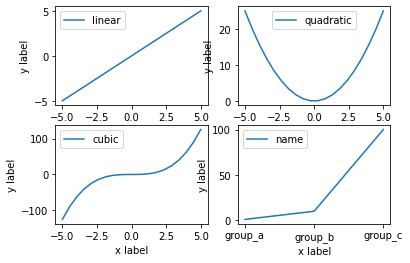

In [4]:
# 创建最大的绘图对象；创建了 2x2 共 4 个图
fig, axes = plt.subplots(2, 2)
x = np.linspace(-5, 5, 20)

# 分别在每个图上进行绘制
axes[0, 0].plot(x, x, label="linear")
axes[0, 1].plot(x, x ** 2, label="quadratic")
axes[1, 0].plot(x, x**3, label="cubic")

# 字符串也可以作为 x 轴
axes[1, 1].plot(['group_a', 'group_b', 'group_c'], [1, 10, 100], label="name")

# 设置图的 label
for ax in axes.flat:
    ax.set_xlabel("x label")
    ax.set_ylabel("y label")
    ax.legend()     # 显示曲线的说明文字

# 如果是在 GUI 中进行绘图，需要执行以下语句
# plt.show()

## 调整样式

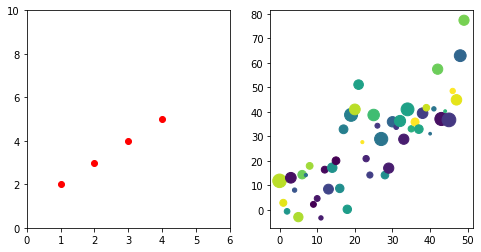

In [5]:
fig = plt.figure(figsize=(8, 4))

axes1 = fig.add_subplot(121)
# r 表示红色，o 表示原点；默认是 b- 表示蓝色线条
axes1.plot([1, 2, 3, 4], [2, 3, 4, 5], "ro")
# axis() 用于调整坐标轴的范围
axes1.axis([0, 6, 0, 10])

# 将样式和数据包装在一起
data = {
    "x": np.arange(50),
    "y": np.arange(50) + 10 * np.random.randn(50),
    "color": np.random.randint(0, 50, 50),          # 每个点的颜色
    "size": np.abs(np.random.randn(50)) * 100       # 每个点的大小
}

axes2 = fig.add_subplot(122)
# 绘制散点图
axes2.scatter("x", "y", c="color", s="size", data=data)

## 更改布局

<BarContainer object of 3 artists>

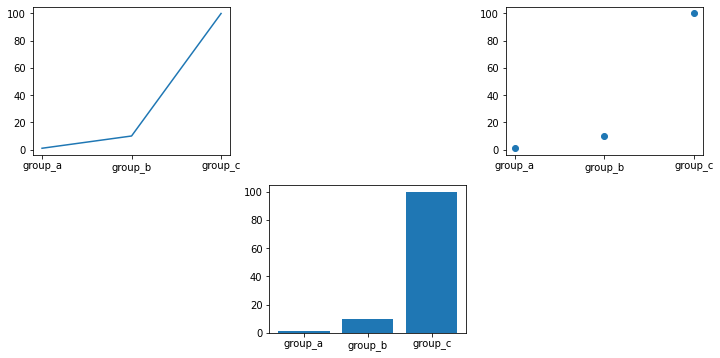

In [6]:
x = ['group_a', 'group_b', 'group_c']
y = [1, 10, 100]

# 设置整个画布的尺寸：宽12，高6
fig = plt.figure(figsize=(12, 6))

# 增加一个作图空间
# 231 表示将 figure 分为 2x3 的格子，作图空间位于第 1 个格子
axes1 = fig.add_subplot(231)
axes1.plot(x, y)

axes2 = fig.add_subplot(233)
axes2.scatter(x, y)

axes3 = fig.add_subplot(235)
axes3.bar(x, y)

## 注释

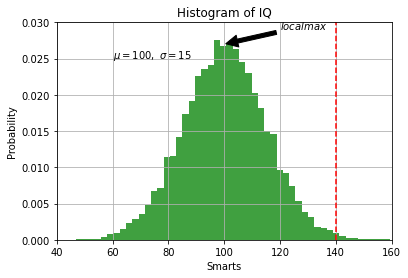

In [7]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

fig, axes = plt.subplots()
axes.hist(x, 50, density=1, facecolor="g", alpha=0.75)

axes.set_xlabel("Smarts")
axes.set_ylabel("Probability")
axes.set_title("Histogram of IQ")
axes.axis([40, 160, 0, 0.03])

# 在图上放置注释，支持 LaTeX
# 位置就是数据坐标的位置
axes.text(60, .025, r"$\mu=100,\ \sigma=15$")

# 放置箭头样子的注释
# xy 是需要注释的数据点的位置，xytext 是文字的位置
axes.annotate(r"$ local max $", xy=(100, 0.027), xytext=(120, 0.029),
              arrowprops={"facecolor": "black", "shrink": 0.03})

# 显示背景的格子
axes.grid(True)

# 添加标识的直线
axes.axvline(140, ls="--", color="r")


## 不同的图类型

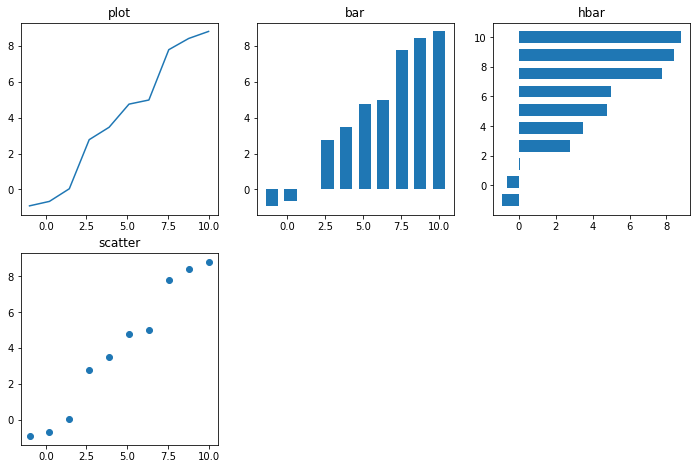

In [8]:
# 数据集
x = np.linspace(-1, 10, 10)
y = x + np.random.randn(10)

fig = plt.figure(figsize=(12, 12))

def draw(func, idx, title):
    axes = fig.add_subplot(3, 3, idx)
    func(axes, x, y)
    axes.set_title(title)

# plot 绘制出折线或者散点图
draw(plt.Axes.plot, 1, "plot")

# 直方图
draw(plt.Axes.bar, 2, "bar")

# 水平直方图
draw(plt.Axes.barh, 3, "hbar")

# 散点图
draw(plt.Axes.scatter, 4, "scatter")

## 二维向量场

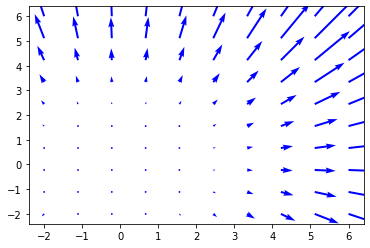

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2, 6, 10)
y = np.linspace(-2, 6, 10)
x, y = np.meshgrid(x, y)
u = (x ** 2 + y ** 2) * x
v = (x ** 2 + y ** 2) * y

fig, axes = plt.subplots()

axes.quiver(x, y, u, v, color="b")

## 颜色映射

颜色映射对象：`cmap` 。这个对象可以基于数据的值为数据点赋予颜色。

- `ListedColormap`：固定赋予某几个颜色，颜色之间没有渐变
- `LinearSegmentedColormap`：颜色之间有渐变

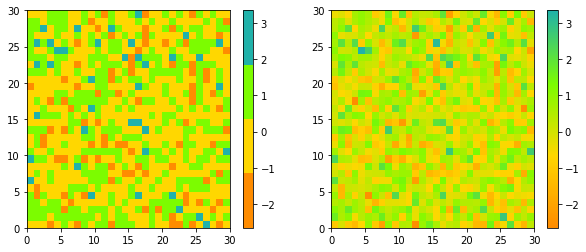

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

data = np.random.randn(30, 30)

fig = plt.figure(figsize=(10, 4))
colors = ["darkorange", "gold", "lawngreen", "lightseagreen"]
linear = [0, 0.33, 0.66, 1.0]

# 不连续的颜色映射
axes1 = fig.add_subplot(121)
psm1 = axes1.pcolormesh(data, cmap=ListedColormap(colors))
fig.colorbar(psm1, ax=axes1)

# 线性插值的颜色映射
axes2 = fig.add_subplot(122)
psm2 = axes2.pcolormesh(data, cmap=LinearSegmentedColormap.from_list(
    "name", list(zip(linear, colors))))
fig.colorbar(psm2, ax=axes2)


## np.meshgrid

原理如下：

<img src="./img/meshgrid.png" width=400 />

例子：

In [11]:
import numpy as np

x = np.arange(1, 5)
y = np.arange(1, 5)
X, Y = np.meshgrid(x, y)
print("X: \n", X)
print("Y: \n", Y)

X: 
 [[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
Y: 
 [[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]]


## 绘制图像

指定每个像素的颜色

数据格式为 `array(m, n, 3)`

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


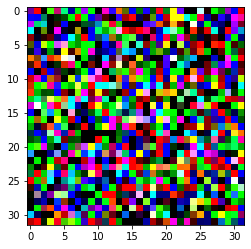

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

data = np.random.randn(32, 32, 3)

plt.imshow(data)